In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
#Load dataset
churn_df = pd.read_csv("banking_churn.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Check the format of the Data.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# To check the number of unique classes of each attributes
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
#Check For Missing Values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
#Convert HasCrCard into Categorical Field
churn_df['HasCrCard'] = churn_df['HasCrCard'].replace([0,1],['No','Yes'])
churn_df.IsActiveMember = churn_df["IsActiveMember"].replace([0,1],["No","Yes"])

In [43]:
#Descriptive Statistics For the Categorical Fields
a= churn_df[['Geography','Gender',"HasCrCard","IsActiveMember"]].describe()
df_styled = a.style.background_gradient()
dfi.export(df_styled,"mytable1.jpg")
a

C:\Program Files\Google\Chrome\Application\chrome.exe


,Geography,Gender,HasCrCard,IsActiveMember
count,10000,10000,10000,10000
unique,3,2,2,2
top,France,Male,Yes,Yes
freq,5014,5457,7055,5151


In [13]:
# Separate the target and the other features to analyze the features only
y = churn_df['Exited']
# churn_df = churn_df.drop(columns=['Exited'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
discrete_features = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure']
churn_df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure']]

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Tenure
0,France,Female,1,1,1,2
1,Spain,Female,1,0,1,1
2,France,Female,3,1,0,8
3,France,Female,2,0,0,1
4,Spain,Female,1,1,1,2
...,...,...,...,...,...,...
9995,France,Male,2,1,0,5
9996,France,Male,1,1,1,10
9997,France,Female,1,0,1,7
9998,Germany,Male,2,1,0,3


In [16]:
#Descriptive Statistics For the Categorical Fields
a= churn_df[['Geography','Gender',"HasCrCard","IsActiveMember"]].describe()
df_styled = a.style.background_gradient()
dfi.export(df_styled,"mytable1.jpg")
a

C:\Program Files\Google\Chrome\Application\chrome.exe


,HasCrCard,IsActiveMember
count,10000.00000,10000.000000
mean,0.70550,0.515100
std,0.45584,0.499797
min,0.00000,0.000000
25%,0.00000,0.000000
50%,1.00000,1.000000
75%,1.00000,1.000000
max,1.00000,1.000000


#### Visualizing target variable

<function matplotlib.pyplot.show(close=None, block=None)>

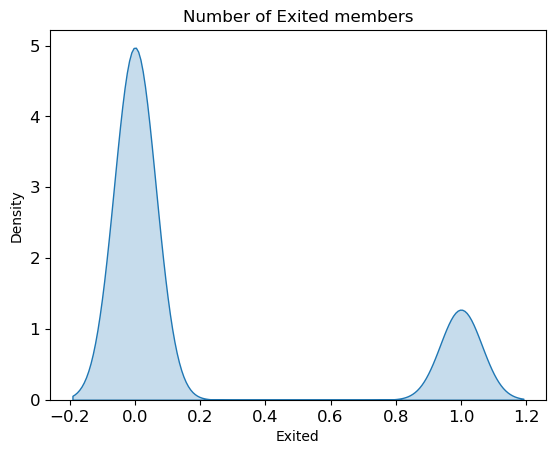

In [23]:
sns.kdeplot(x=churn_df["Exited"], shade=True)
plt.title("Number of Exited members")
plt.show

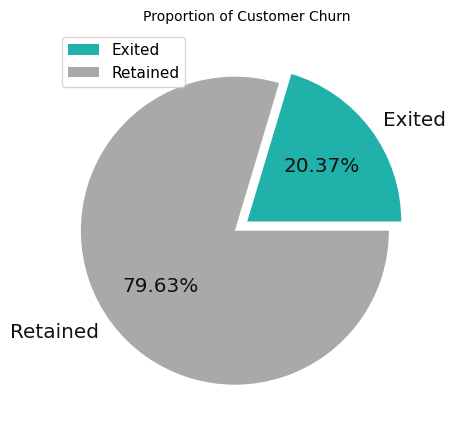

In [24]:
#Create a list that contains the number of exited customer 
ExitedList = [churn_df.Exited[churn_df['Exited']==1].count(), churn_df.Exited[churn_df['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(5, 5))
plt.title('Proportion of Customer Churn', size = 10)

#display the proportion of Customer Churn
plt.pie(ExitedList,labels = ['Exited', 'Retained'], autopct='%.2f%%',
        explode = (0 ,0.10),textprops={'color':"#111",'size': "x-large"}, colors = ['lightseagreen','darkgrey'])
plt.legend(labels = ['Exited', 'Retained'], loc = "best",prop={'size': 11})

plt.savefig("Scatter2.jpg",bbox_inches='tight',dpi =200)

#### Analyzing the relationship between target "Exited" and other Numerical features

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

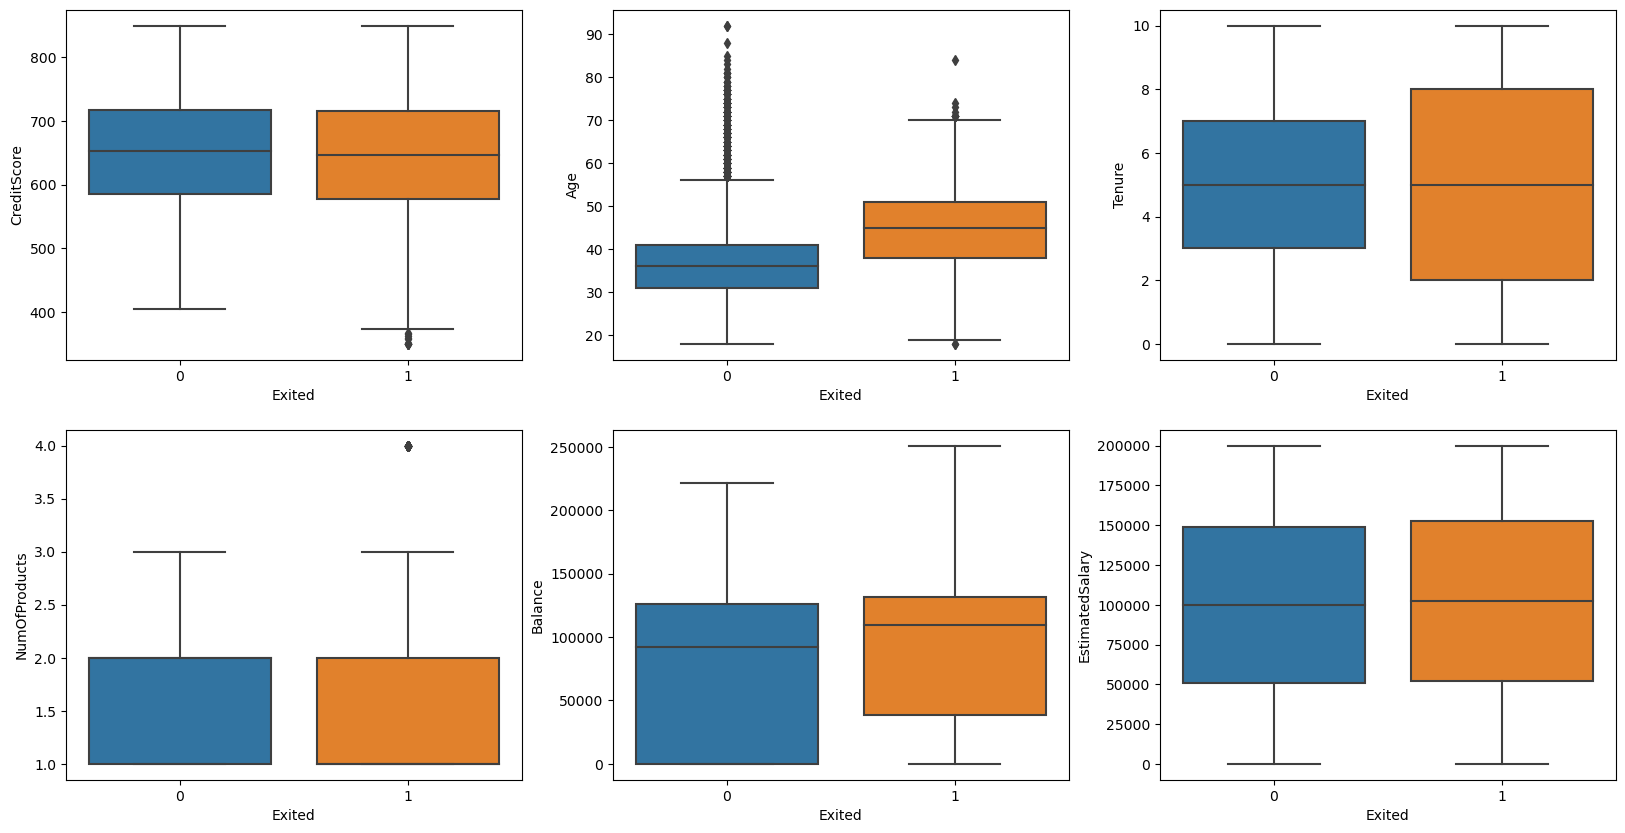

In [17]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

#### Analyzing the correlation among "Exited" and other Categorical Features

<AxesSubplot:xlabel='Exited', ylabel='count'>

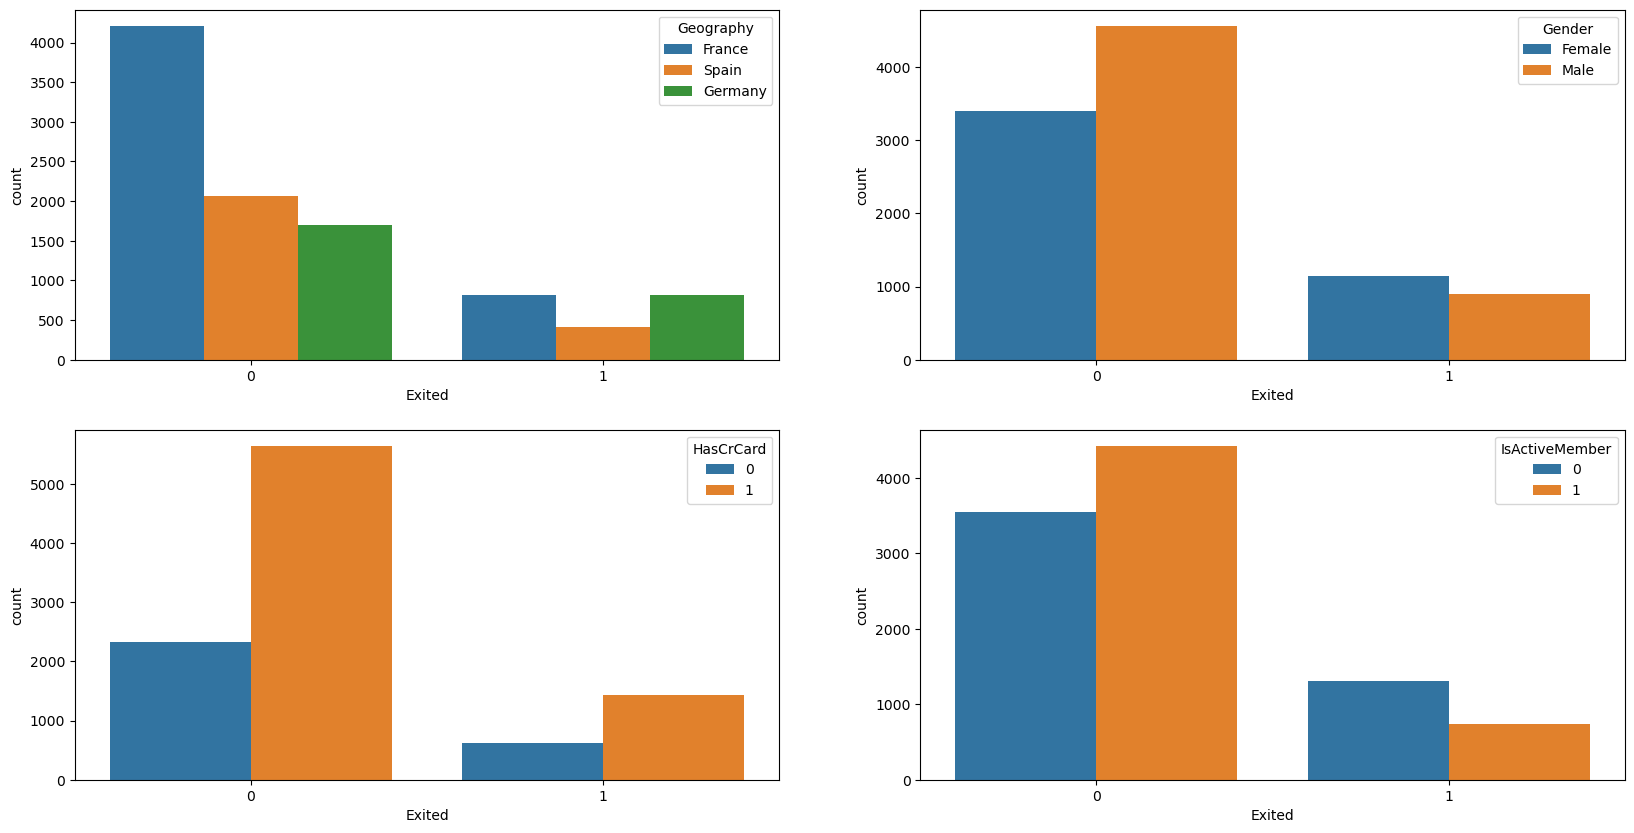

In [18]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

#### Analyzing Correlation between continuous data using Heatmap plot

<AxesSubplot:>

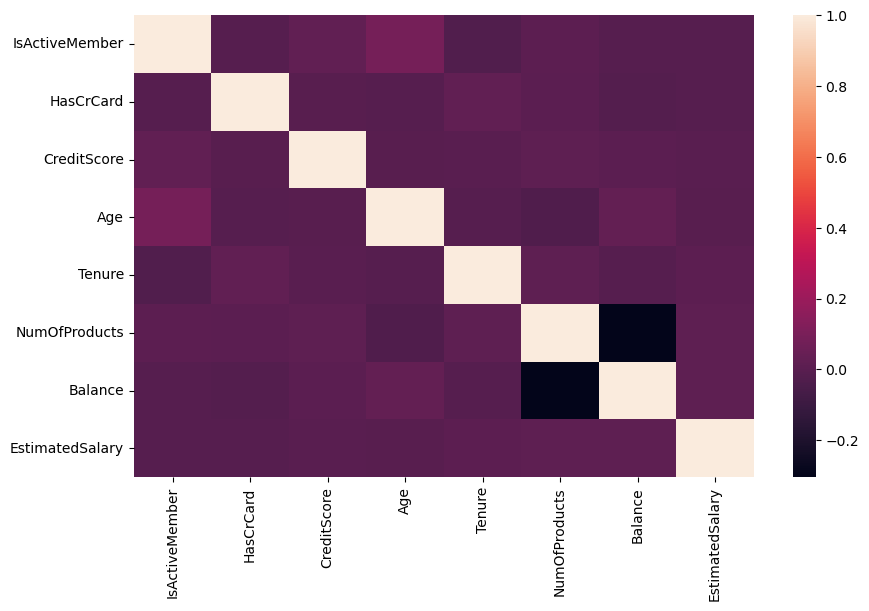

In [19]:
correlation = churn_df[['IsActiveMember','HasCrCard','CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
sns.heatmap(correlation)

In [20]:
correlation

,IsActiveMember,HasCrCard,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
IsActiveMember,1.000000,-0.011866,0.025651,0.085472,-0.028362,0.009612,-0.010084,-0.011421
HasCrCard,-0.011866,1.000000,-0.005458,-0.011721,0.022583,0.003183,-0.014858,-0.009933
CreditScore,0.025651,-0.005458,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,0.085472,-0.011721,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,-0.028362,0.022583,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.009612,0.003183,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,-0.010084,-0.014858,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.011421,-0.009933,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


### Visualizing Relation between Churn rate & other variables

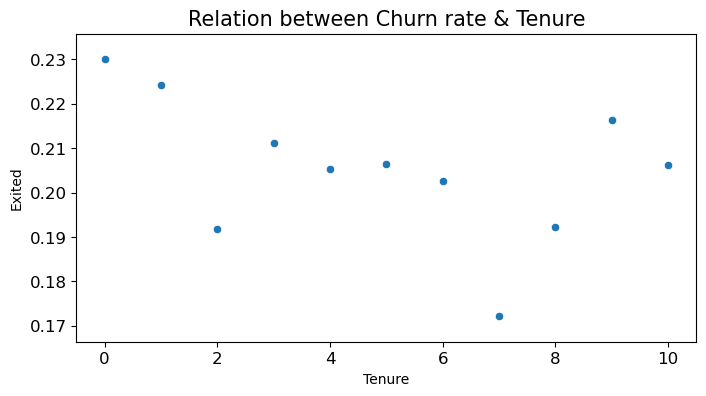

In [14]:
#Churn rate by tenure
plot_by_tenure = churn_df.groupby('Tenure').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(8, 4))
plt.title('Relation between Churn rate & Tenure', size = 15)
g = sns.scatterplot(x=plot_by_tenure["Tenure"],y=plot_by_tenure["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter3.jpg",bbox_inches='tight',dpi =200)

In [5]:
print(f"\n\033[1mFindings:\033[0m In terms of tenure, clients on either end of the spectrum (having spent little or a lot of time with the bank) are more likely to churn than those with an average tenure.")


Findings: In terms of tenure, clients on either end of the spectrum (having spent little or a lot of time with the bank) are more likely to churn than those with an average tenure.


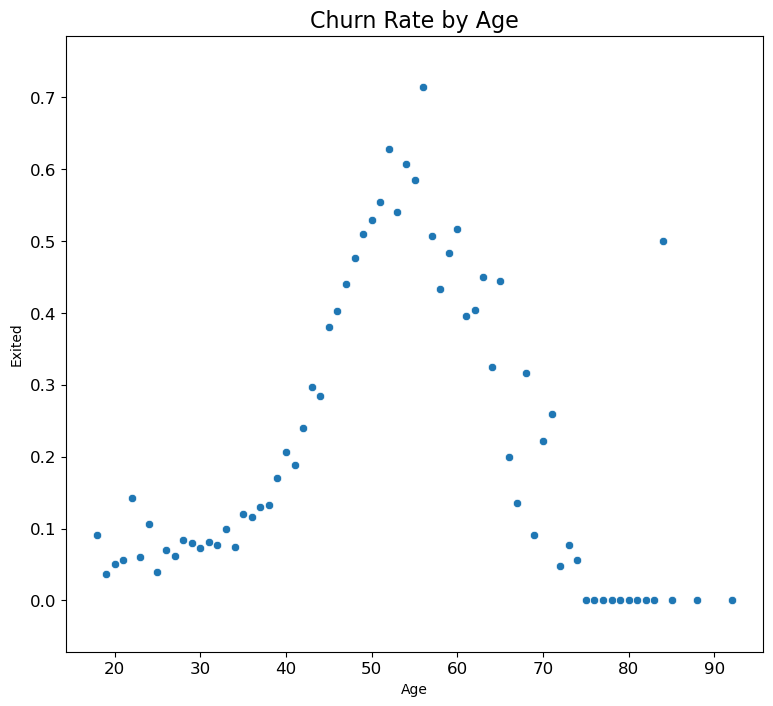

In [54]:
#Churn Rate by Age
plot_by_age = churn_df.groupby('Age').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Churn Rate by Age', size = 16)
g = sns.scatterplot(x=plot_by_age["Age"],y=plot_by_age["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter4.jpg",bbox_inches='tight',dpi =200)

In [6]:
print(f"\n\033[1mFindings:\033[0m Despite making up a small fraction of the customer base, consumers over the age of 50 have a tendency to leave the bank.")


Findings: Despite making up a small fraction of the customer base, consumers over the age of 50 have a tendency to leave the bank.


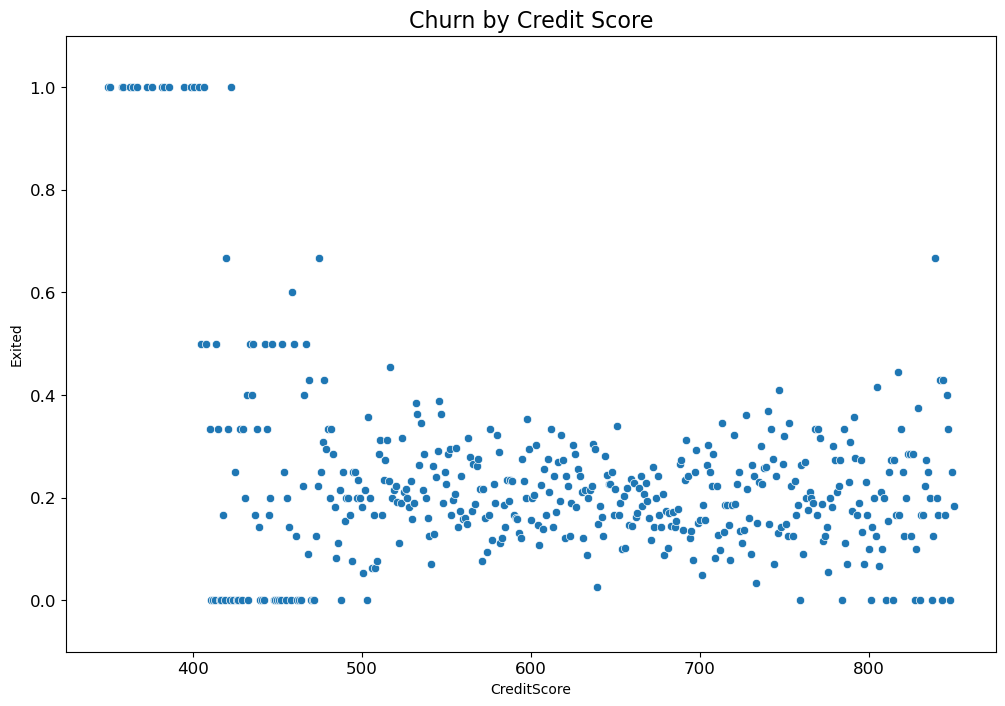

In [56]:
#Churn Rate by Credit Score
plot_by_score= churn_df.groupby('CreditScore').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Churn by Credit Score', size = 16)
g = sns.scatterplot(x=plot_by_score["CreditScore"],y=plot_by_score["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter5.jpg",bbox_inches='tight',dpi =200)

In [7]:
print(f"\n\033[1mFindings:\033[0m Customers with lower credit card scores are more likely to churn. ")


Findings: Customers with lower credit card scores are more likely to churn. 


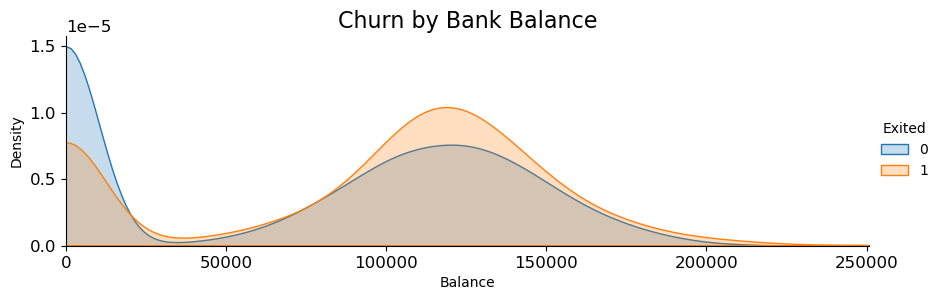

In [58]:
#churn rate by balance
facet = sns.FacetGrid(churn_df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, churn_df["Balance"].max()))
facet.add_legend()

plt.title('Churn by Bank Balance', size = 16)
facet.savefig("Scatter7.jpg",bbox_inches='tight',dpi =200)

In [8]:
print(f"\n\033[1mFindings:\033[0m There will be less capital available for lending as a result of the bank losing clients with substantial bank accounts.")


Findings: There will be less capital available for lending as a result of the bank losing clients with substantial bank accounts.


In [23]:
drop_list = ['RowNumber','CustomerId','Surname']
X= churn_df.drop(columns=drop_list)

###  one-hot encoding

In [60]:
#Remove less important Features
churn_df.drop(['RowNumber', 'Surname',"CustomerId"],axis=1,inplace=True) 

In [26]:
X['Gender'].loc[X['Gender']=='Female'] = 0
X['Gender'].loc[X['Gender']=='Male'] = 1

C:\Users\hp\AppData\Local\Temp\ipykernel_16016\3927158402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'].loc[X['Gender']=='Female'] = 0
C:\Users\hp\AppData\Local\Temp\ipykernel_16016\3927158402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'].loc[X['Gender']=='Male'] = 1


In [27]:
X.head()
# X.groupby('Gender').max()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [28]:
one_hot_features = ['Geography']
X=pd.get_dummies(X,columns=one_hot_features)

### Splitting dataset into training set and test set 

In [25]:
# Using stratification method to stratify the dataset based on classes in target feature y
# and then split test set, training set. Finally, shuffle two datasets
X_train, X_test, y_train, y_test = train_test_split(churn_df[churn_df.columns], churn_df[churn_df.columns], test_size=0.2, random_state=100)

In [26]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
print(f"Train | X->{X_train.shape}, y->{y_train.shape}")
print(f"Test | X->{X_test.shape}, y->{y_test.shape}")

Train | X->(8000, 14), y->(8000, 14)
Test | X->(2000, 14), y->(2000, 14)


In [ ]:
def num_impute(data):
    num_missing = pd.DataFrame(data.loc[:,num_col_with_na], columns=["area"])
    num_imputed = num_imputer.fit_transform(num_missing)
    data[num_col_with_na] = num_imputed
    return data
X_train = num_impute(X_train)
X_test = num_impute(X_test)

### Data scaling

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## If using Min-Max scaler
# sm = MinMaxScaler()
# X_train = sm.fit_transform(X_train,max=1.0,min=0.0)
# X_test = ss.transform(X_test)

In [38]:
X_train[:10]

array([[-0.17298471,  0.91333963,  0.28920217,  1.7311989 , -1.21891593,
        -0.91276854, -1.5421992 ,  0.968496  , -0.35204406, -0.99973337,
        -0.57755555,  1.73205081],
       [ 0.60240695, -1.09488296, -1.50931877, -0.3411556 , -0.07697728,
        -0.91276854,  0.64842466, -1.03252879,  0.07231455, -0.99973337,
         1.73143519, -0.57735027],
       [-1.05176192, -1.09488296, -0.18409282,  1.38580648, -1.21891593,
         0.79610915, -1.5421992 , -1.03252879, -0.02671055,  1.0002667 ,
        -0.57755555, -0.57735027],
       [-0.04892204, -1.09488296,  0.85715615,  0.69502165,  0.2296249 ,
        -0.91276854,  0.64842466,  0.968496  ,  0.86622125,  1.0002667 ,
        -0.57755555, -0.57735027],
       [ 0.81951661, -1.09488296,  0.57317916,  0.69502165,  0.23727778,
         0.79610915,  0.64842466, -1.03252879, -0.49661695, -0.99973337,
        -0.57755555,  1.73205081],
       [ 0.32326595, -1.09488296,  0.38386116,  1.04041407,  1.24455182,
        -0.91276854, -

In [61]:
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
model_ls = [rf_clf, lr_clf, knn_clf,svc_clf]
model_names = ['Random Forest','logistic Reg', 'KNN','SVC']

#### Training and testing using Random Forest

In [69]:
X = churn_df.drop('Exited',axis=1)
y = churn_df['Exited']

In [ ]:
X_train_ = np.array(X_train)
scaler = StandardScaler()

# For the test set
X_test_ = np.array(X_test)

X_train_transform = scaler.fit_transform(X_train_)
X_test_transform = scaler.fit_transform(X_test_)

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
# Implementing Oversampling for Handling Imbalanced 
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
#Create Feature variable X and Target variable y
y1 = y_res
X1 = X_res

In [ ]:
#Fit the logistic Regression Model
logit = LogisticRegression(random_state=50)
logit.fit(X1_train,y1_train)

#Predict the value for new, unseen data
pred = logit.predict(X1_test)

# Find Accuracy using accuracy_score method
logit_accuracy = round(metrics.accuracy_score(y1_test, pred) * 100, 2)
logit_recall = round(metrics.recall_score(y1_test,pred)*100, 2)
logit_precision = round(metrics.precision_score(y1_test,pred)*100, 2)
logit_f1 = round(metrics.f1_score(y1_test,pred)*100, 2)